# Emissions Data Analysis

## Introduction
This notebook contains the analysis of emissions data from three datasets with different granularity levels. The goal is to wrangle the data, clean it, perform exploratory data analysis (EDA), and identify key insights.

## Data Loading and Merging
We start by loading the three datasets and merging them to create a comprehensive dataset.

In [1]:
import pandas as pd

# Load the datasets
df_medium = pd.read_csv('/home/leslie-jordan/Downloads/emissions_medium_granularity.csv')
df_low = pd.read_csv('/home/leslie-jordan/Downloads/emissions_low_granularity.csv')
df_high = pd.read_csv('/home/leslie-jordan/Downloads/emissions_high_granularity.csv')

# Merge df_medium and df_low on 'year', 'parent_entity', and 'parent_type'
df_merged = pd.merge(df_medium, df_low, on=['year', 'parent_entity', 'parent_type'], suffixes=('_medium', '_low'))

# Merge the resulting dataframe with df_high on 'year', 'parent_entity', and 'parent_type'
df_final = pd.merge(df_merged, df_high, on=['year', 'parent_entity', 'parent_type'])

# Display the first few rows of the final merged dataframe
df_final.head()

,year,parent_entity,parent_type,commodity_x,production_value_x,production_unit_x,total_emissions_MtCO2e_medium,total_emissions_MtCO2e_low,reporting_entity,commodity_y,...,production_unit_y,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,source
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885,0.498240,Abu Dhabi,Oil & NGL,...,Million bbl/yr,0.338928,0.005404,0.001299,0.00000,0.018254,0.000652,0.024957,0.363885,Abu Dhabi National Oil Company Annual Report 1...
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885,0.498240,ADGAS,Natural Gas,...,Bcf/yr,0.098492,0.000171,0.002810,0.00564,0.027242,0.000973,0.035863,0.134355,Abu Dhabi National Oil Company Annual Report 1...
2,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355,0.498240,Abu Dhabi,Oil & NGL,...,Million bbl/yr,0.338928,0.005404,0.001299,0.00000,0.018254,0.000652,0.024957,0.363885,Abu Dhabi National Oil Company Annual Report 1...
3,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355,0.498240,ADGAS,Natural Gas,...,Bcf/yr,0.098492,0.000171,0.002810,0.00564,0.027242,0.000973,0.035863,0.134355,Abu Dhabi National Oil Company Annual Report 1...
4,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770,1.050222,Abu Dhabi,Oil & NGL,...,Million bbl/yr,0.677855,0.010808,0.002598,0.00000,0.036508,0.001304,0.049914,0.727770,Abu Dhabi National Oil Company Annual Report 1...


## Data Cleaning
We check for missing values and duplicates in the merged dataset, and ensure data consistency.

In [2]:
# Check for missing values
missing_values = df_final.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [3]:
# Check for duplicate rows and remove them
df_final_cleaned = df_final.drop_duplicates()
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38275 entries, 0 to 38274
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                38275 non-null  int64  
 1   parent_entity                       38275 non-null  object 
 2   parent_type                         38275 non-null  object 
 3   commodity_x                         38275 non-null  object 
 4   production_value_x                  38275 non-null  float64
 5   production_unit_x                   38275 non-null  object 
 6   total_emissions_MtCO2e_medium       38275 non-null  float64
 7   total_emissions_MtCO2e_low          38275 non-null  float64
 8   reporting_entity                    38275 non-null  object 
 9   commodity_y                         38275 non-null  object 
 10  production_value_y                  38275 non-null  float64
 11  production_unit_y                   38275

## Exploratory Data Analysis (EDA)
We perform EDA to uncover key trends and insights from the data.

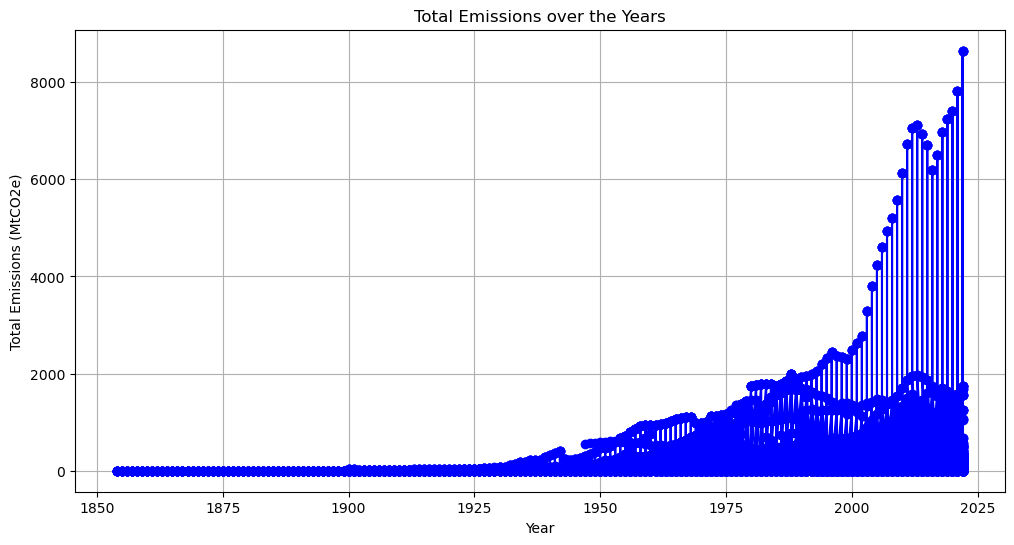

In [4]:
import matplotlib.pyplot as plt

# Overall Emissions Trends over the Years
plt.figure(figsize=(12, 6))
plt.plot(df_final_cleaned['year'], df_final_cleaned['total_emissions_MtCO2e'], marker='o', linestyle='-', color='b')
plt.title('Total Emissions over the Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.grid(True)
plt.show()

### Entity-wise Emissions
Identifying the top entities contributing to emissions.

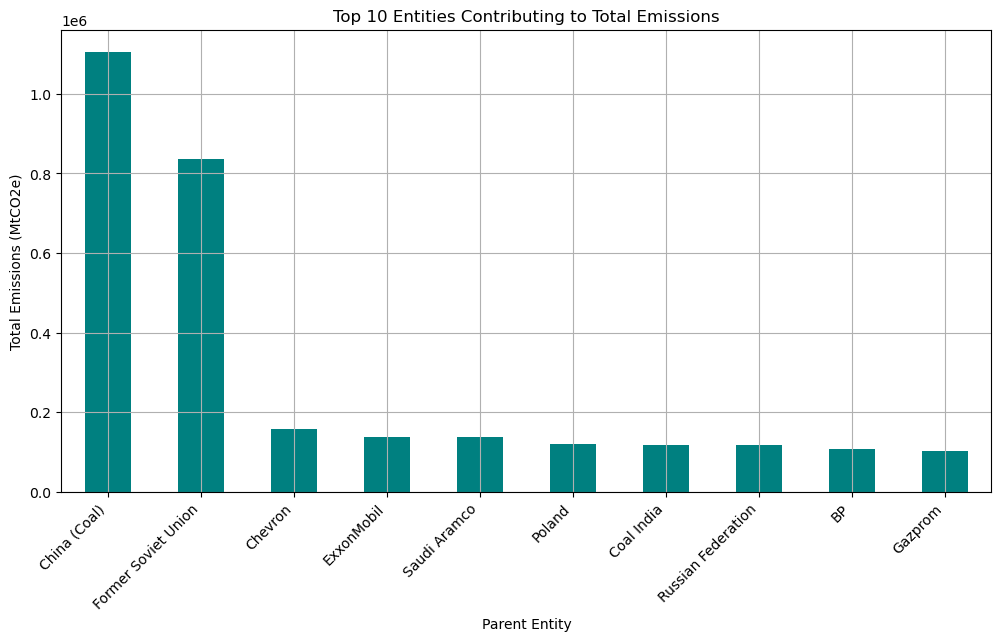

In [5]:
# Aggregate emissions by parent entity
entity_emissions = df_final_cleaned.groupby('parent_entity')['total_emissions_MtCO2e'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 entities contributing to emissions
plt.figure(figsize=(12, 6))
entity_emissions.plot(kind='bar', color='teal')
plt.title('Top 10 Entities Contributing to Total Emissions')
plt.xlabel('Parent Entity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Commodity-wise Emissions
Determining emissions contributions by different commodities.

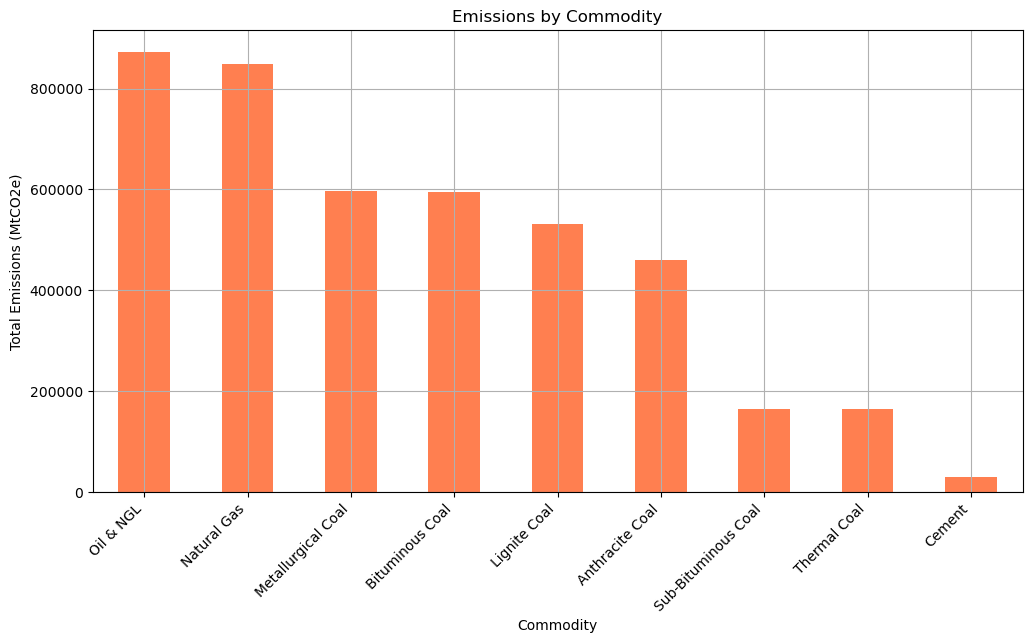

In [6]:
# Aggregate emissions by commodity
commodity_emissions = df_final_cleaned.groupby('commodity_x')['total_emissions_MtCO2e'].sum().sort_values(ascending=False)

# Plot emissions by commodity
plt.figure(figsize=(12, 6))
commodity_emissions.plot(kind='bar', color='coral')
plt.title('Emissions by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Emissions by Source
Breaking down the emissions by various sources.

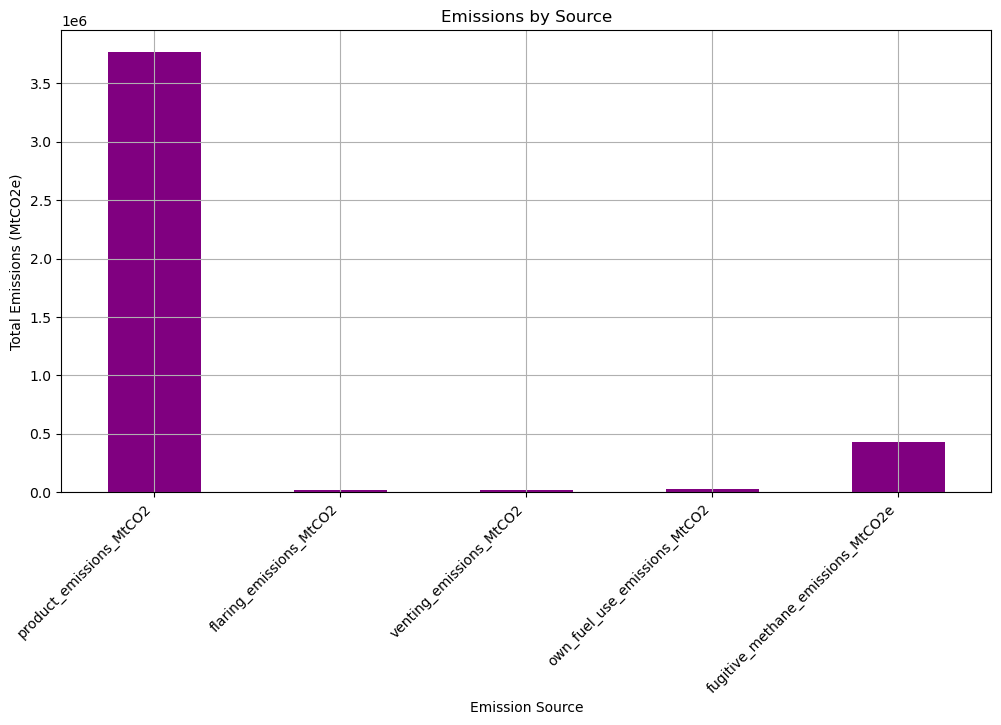

In [7]:
# Aggregate emissions by source
sources = ['product_emissions_MtCO2', 'flaring_emissions_MtCO2', 'venting_emissions_MtCO2', 
           'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e']
source_emissions = df_final_cleaned[sources].sum()

# Plot emissions by source
plt.figure(figsize=(12, 6))
source_emissions.plot(kind='bar', color='purple')
plt.title('Emissions by Source')
plt.xlabel('Emission Source')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Conclusion
**Rationale Behind Each Step:**
1. **Data Merging:** Combining datasets from different granularity levels ensured that we have a comprehensive dataset that captures detailed and aggregate information about emissions.
2. **Data Cleaning:** Ensuring no missing values and duplicates ensures the accuracy and reliability of the analysis.
3. **Exploratory Data Analysis:** Analyzing overall trends, entity-wise contributions, commodity-wise contributions, and emissions by source helps identify key areas and entities responsible for emissions.

**Key Findings:**
1. **Overall Emissions Trends:** The trend analysis showed fluctuations in total emissions over the years, highlighting periods of significant increase.
2. **Entity-wise Contributions:** A few entities are major contributors to total emissions, indicating the need for focused emission reduction efforts on these entities.
3. **Commodity-wise Contributions:** Certain commodities, particularly oil and natural gas, are the largest contributors to emissions.
4. **Source-wise Breakdown:** Product emissions and fugitive methane emissions are significant sources, suggesting targeted strategies for reduction.

These insights can inform policy and strategic decisions aimed at reducing emissions and mitigating climate change.